## Align the reads to the human genome     
Map these reads to the human genome first to remove any contamination.

### **Terminal**     
**bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S aligned_human.sam --un filtered.fastq**     


-p 4: use 4 threads/cores to run Bowtie2    
--very-fast: control the tradeoff between speed and sensitivity     
--no-unal: not to report unaligned reads to save space in output file         

input: 1) a bowtie2 database containing human genome, 2) a fastq file containing the illumina reads of the contaminated Shewanella oneidensis sequences.    

output:1) a sam file containing the contamination (human sequence) which matches the human genome reference, 2) a fastq file containing unaligned reads (the filtered S.oneidensis sequence).


**After running the command above, the terminal prints out:**     
1124714 reads; of these:     
  1124714 (100.00%) were unpaired; of these:     
    1028379 (91.43%) aligned 0 times     
    87274 (7.76%) aligned exactly 1 time      
    9061 (0.81%) aligned >1 times      
8.57% overall alignment rate

>**How many reads map to humans?**    
</Br>    
There are total 1124714 reads, but only (1124714)(8.57%) = 96388 reads map to humans.     
</Br>    
**What will you use for the database? Input reads**          
</Br>    
I will use the human genome database for the database because we want to identify the hand-in human-contaminated shewanella oneidensis genome. The input reads I used is the lab-provided illumina_reads.fastq, which is contaminated.     
</Br>    
**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?**   
</Br>    
The output in this run, unaligned.fastq, contains the filtered S. oneidensis genome. If I use the unaligned.fastq as the input read files and the human genome reference to run it again, the new unaligned.fastq will contain 0% human sequence. The terminal would print out a smaller number of alignment rate (approx. 0% aligned 0 times, approx. 0% aligned exactly 1 time, approx. 0% aligned > 1 times, and approx. 0% overall alignment rate). Since fastq is a text-based-format file that contains both nucleotide sequence alignments and their corresponding quality scores encoded in ASCII characters, the unaligned.fastq will contain the unaligned sequences and the their corresponding quality scores.   



> **What percentage of your sequencing library came from contaminating human DNA?**     
</Br>     
7.76% of the nucleotides aligned exactly 1 time and 0.81% aligned more than 1 time. In other words, 8.57% total of the sequencing library came from contaminating human DNA.     


## Align the reads to the S. oneidensis reference genome

### Terminal    
**bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U filtered.fastq -S output.sam --un unaligned.fastq**   

inputs: 1) a provided database containing S.oneidensis reference genome; 2) a fastq file containing the filtered (human contamination removed) sequences.     

outputs: 1) a sam file containing the aligned sequence of our filtered sequence of S. oneidensis and the reference sequences; 2) a fastq file containing the unaligned sequences (deviate from the reference).

**After running the command above, the terminal prints out:**    
1028379 reads; of these:     
  1028379 (100.00%) were unpaired; of these:     
    299560 (29.13%) aligned 0 times     
    687571 (66.86%) aligned exactly 1 time    
    41248 (4.01%) aligned >1 times    
70.87% overall alignment rate

> **How many map to S. oneidensis?**    
</Br>    
There are total 1028379 reads, and (1028379)(70.87%) = 728812 reads map to S.oneidensis.     
</Br>    
**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?**     
</Br>    
The unaligned.fastq output here contains sequences that does not match the S. oneidensis referece genome, which is 29.13% (aligned 0 times). If I use this unaligned.fastq and the S. oneidensis reference genome to run bowtie2 again, the new unaligned.fastq will have much lower percentage alignment because we compared the unwanted (other contaminations) sequence to the S.oneidensis reference genome. Since fastq is a text-based-format file that contains both nucleotide sequence alignments and their corresponding quality scores encoded in ASCII characters, the unaligned.fastq will contain the unaligned sequences and the their corresponding quality scores.    
</Br>    
**What percentage of your filtered library didn’t align to the reference genome? If you use --very- sensitive instead of --very-fast, does this percentage increase or decrease?**     
</Br>    
29.13% of the filtered library didn't align to the reference genome. If I use --very-senstive, the percentage will decrease because the program now will become more strict when checking the alignmentes and reject alignment with the low-quality ones, producing a more accurate result.


## Generate a coverage plot

### Terminal

**samtools view -b output.sam > output.bam**    
input: sam file; output: bam file (binary)

**samtools view -F 4 output.bam**

> **Result:**     
read126646      0       AE014299.2      3561284 3       299M    *       0       0       ATAATACCTACCACTTACCTGAGCAATGAAATTGAATTAGTGGGTATTCTATCGGGATCTTGTGGAAAACTTAAAGTAAAGATAGGTAACTCAGGGGAAAGACGGTGCAGTTATCCCATCGAATATGGCCTGTTCTGGCTGGTAATACAAGTCTTTTCGACAAAGAATAACAAAAATTTAACTAAGCGAACAAAAAAAAAACGAACAATATCAAACCGGGAAAAAAATGAAAATAAAAAAACATTCTAAAAAACATAAATTGTTCATATTAAACCAAAAAAAACAAATAACAAGTTCGA    CCCCCCFE@EFDCGGGBEEFGGFFF?G@D<FFFGFGGGFGEEFCGGG9,<FGEED+@F?<FEFEFD9EFDC,@EFE;E99>==FC@;5==,CF8,A@BCFFFFC@CDGGCFFGF9EFE;:,@E@GF9BEEFEEF,=,,998>DDG,44C9,9,C,4,9+4++8D,@D,,7@,,6484,7,,,77@,3+866BDF,@8+5@C355@*>,,6,5,652***4*4=BFE*3++1++++5?2+3*3*0++3+03@+2*13++302++2+3++2+30<CF*2;*;*//*;8C+<++0+03<9**    AS:i:-125   XN:i:0   XM:i:42 XO:i:0  XG:i:0  NM:i:42    MD:Z:89A56T14C6C0C1C0G1G4G0T8T4T1T0C0C8G4G7T5G2T0G1T1T2C0T0C0T1G2T1T3G0G4G4G1A2C1G5G2G10G0A1G6       YT:Z:UU

**samtools sort output.bam > output.sorted.bam**    
input: bam file; output: a sorted bam file (sorts a bam file by coordinates)     

**samtools index output.sorted.bam**     
input:a sorted.bam file; output: output.sorted.bam.bai (with index)

**samtools depth -a output.sorted.bam > pileup.tab**    
input: a sorted bam file; output: tab file (a list of coordinates in a genome and the number of times a read aligned to that position)  


### Codes

***1. Import string and matplotlib packages.***

In [1]:
import string
import numpy as np
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SeqIO
import matplotlib.pyplot as plt
%matplotlib inline
#Image('1.png')

***2. Open .tab file in 'read' mode, assign the contents to variable `rawdata`.***    


In [2]:
f = open('pileup.tab', 'r')
rawdata = f.readlines()

In [38]:
rawdata[:5] # This just to show you what's inside 'rawdata'

['AE014299.2\t1\t0\n',
 'AE014299.2\t2\t1\n',
 'AE014299.2\t3\t2\n',
 'AE014299.2\t4\t2\n',
 'AE014299.2\t5\t2\n']

***3. Split the data by 'tab', store position and count into list `data`.***      
1) Assign an empty list to `data`.     
2) Loop through each line in "rawdata". 

For each line, use `split` to remove '\t' (tab) and assign the splited line to `temp`. Then use `split` again to remove `\n` and assign the splited item to `temp1`.              
Assign the first and second number to `p`(position) and `c`(count) respectively.     
Append [p, c] to `data`.       
Empty `temp` and begin next loop.

This produces a list of lists, as shown below.

In [4]:
data = []
for i in range(len(rawdata)):
    temp = rawdata[i].split("\t")
    temp1 = temp[2].split("\n")
    p = int(temp[1])
    c = int(temp1[0])
    data.append([p, c])
    #data.append()

In [39]:
data[:5] # This just to show you what's inside 'data'

[[1, 0], [2, 1], [3, 2], [4, 2], [5, 2]]

***4. Get the depth of coverage by accessing the second element of each 2-element-list in `data`. Print out the maximum, minimum, and mean of depth of coverage.***

In [6]:
depth = [d[1] for d in data]
print("maximum coverage is: " + str(max(depth)))
print("minimum coverage is: " + str(min(depth)))
print("mean coverage is: " + str(sum(depth)/len(depth)))

maximum coverage is: 269
minimum coverage is: 0
mean coverage is: 36.955644792125895


> **What is the min, max, and mean coverage across all positions?**    
</br>    
As the calculation shown above, the minmum, maximum, and mean coverage across all positions are 269, 0, and 36.956 respectively.


### Plots

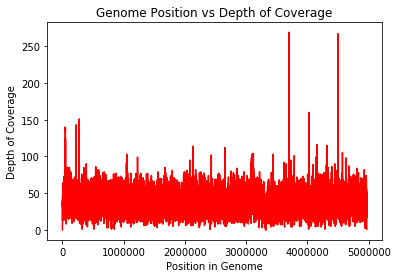

In [7]:
plt.plot(depth, color='red')
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.title('Genome Position vs Depth of Coverage')
plt.show()

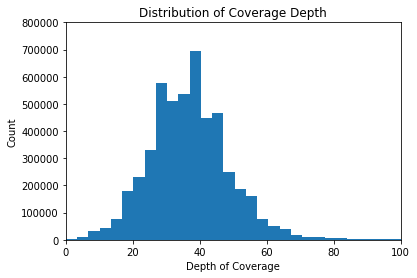

In [8]:
plt.hist(depth, 80)
plt.axis([0, 100, 0, 800000])
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.title('Distribution of Coverage Depth')
plt.show()

> **Do the reads cover the S. oneidensis genome uniformly?**    
</Br>     
No, because the graph 'Genome Position vs Depth of Coverage' shows that depth of coverage varies across the position in genome, and the counts in 'Distribution of Coverage Depth" varies.

## Extra Credit 1

## Terminal   

**samtools view -b aligned_human.sam > jamie.bam**    
input: sam file; output: bam file (binary)      

**samtools sort jamie.bam > jamie.sorted.bam**    
input: bam file; output: a sorted bam file (sorts a bam file by coordinates)     

**samtools index jamie.sorted.bam**     
input:a sorted.bam file; output: output.sorted.bam.bai (with index)

**samtools depth jamie.sorted.bam > jamie.tab**    
input: a sorted bam file; output: tab file (a list of coordinates in a genome and the number of times a read aligned to that position)   
(Note that here I didn't use -a to record the unaligned, otherwise it creates a gb-sized tab file).


### Codes

***1. open `jamie.tab` and save it in `j`***

In [9]:
j = open('jamie.tab', 'r')
j_rawdata = j.readlines()

***2. Use a for loop to access each line in rawdata and split each line by "\t" and "\n", save them in `temp` and `temp1` respectively. Then append the chromosome name, position `p`, and count `c` to a list named `j_data`.***

In [10]:
j_data = []
for i in range(len(j_rawdata)):
    temp = j_rawdata[i].split("\t")
    temp1 = temp[2].split("\n")
    chromosome = temp[0]
    p = int(temp[1])
    c = int(temp1[0])
    j_data.append([chromosome, p, c])

***3. Create a dictionary named `j_chrom_len`. Use a loop to access each line in `j_data`. If the chromosome name is in the dictionary, then increase the count by 1, otherwise create a new dictionary key (the chromosome name) and start from 1. The value (a number) indicates the length of the chromosome.***

In [11]:
j_chrom_len = {}
for i in range(len(j_data)):
    #j_data[i][0] is the chromosome name
    if j_data[i][0] in j_chrom_len:
        j_chrom_len[j_data[i][0]] += 1
    else:
        j_chrom_len[j_data[i][0]] = 1

***4. Create a dictionary named j_chrom_depth. Use a loop to access each line in j_data. If the chromosome name is in the dictionary, then increase the value by the depth of coverage, otherwise create a new dictionary key (the chromosome name) and start from the first depth of coverage showed. The value indicates the total depth of that chromosome.***

In [12]:
j_depth = {}
for i in range(len(j_data)):
    #j_data[i][0] is the chromosome name
    #j_data[i][2] is the depth of coverage at that position
    if j_data[i][0] in j_depth:
        j_depth[j_data[i][0]] += j_data[i][2]
    else:
        j_depth[j_data[i][0]] = j_data[i][2]

In [13]:
j_chrom_len.keys()

dict_keys(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chr1_gl000191_random', 'chr1_gl000192_random', 'chr4_gl000193_random', 'chr4_gl000194_random', 'chr9_gl000199_random', 'chr9_gl000200_random', 'chr9_gl000201_random', 'chr11_gl000202_random', 'chrUn_gl000213', 'chrUn_gl000214', 'chrUn_gl000215', 'chrUn_gl000217', 'chrUn_gl000222', 'chrUn_gl000223', 'chrUn_gl000226', 'chrUn_gl000227', 'chrUn_gl000228', 'chrUn_gl000233', 'chrUn_gl000245', 'chrUn_gl000247'])

***5. Since there are many unknown chromosomes in `j_chrom_len` and `j_depth`, I removed them from the dictionaries.***

In [14]:
unknown = ['chr1_gl000191_random', 'chr1_gl000192_random', 'chr4_gl000193_random', 'chr4_gl000194_random', 
           'chr9_gl000199_random', 'chr9_gl000200_random', 'chr9_gl000201_random', 
           'chr11_gl000202_random', 'chrUn_gl000213', 'chrUn_gl000214', 'chrUn_gl000215', 
           'chrUn_gl000217', 'chrUn_gl000222', 'chrUn_gl000223', 'chrUn_gl000226', 
           'chrUn_gl000227', 'chrUn_gl000228', 'chrUn_gl000233', 'chrUn_gl000245', 
           'chrUn_gl000247']

for i in range(len(unknown)):
    temp = unknown[i] 
    j_chrom_len.pop(temp)
    j_depth.pop(temp)

***6. Use list comprehension to get the total depth and length of each chromosome. And use loop to divide the total depth by chromosome length for each chromosome.***

In [15]:
d = [d for d in j_depth.values()]
l = [l for l in j_chrom_len.values()]
j_avg_depth = []
for i in range(len(j_depth)):
    j_avg_depth.append(d[i]/l[i])

### Plots

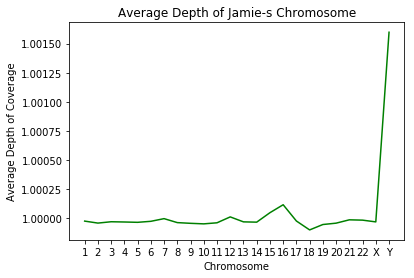

In [16]:
key = [_ for _ in range(1, 23)] + ['X', 'Y']
plt.plot(key, j_avg_depth, color='green')
plt.xlabel('Chromosome')
plt.ylabel('Average Depth of Coverage')
plt.title('Average Depth of Jamie-s Chromosome')
plt.show()

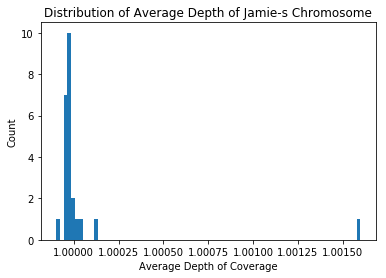

In [17]:
plt.hist(j_avg_depth, 80)
plt.xlabel('Average Depth of Coverage')
plt.ylabel('Count')
plt.title('Distribution of Average Depth of Jamie-s Chromosome')
plt.show()

In [18]:
print('The total length of all Jamie-s X chromosome is: ' + str(j_chrom_len['chrX']))
print('The total length of all Jamie-s Y chromosome is: ' + str(j_chrom_len['chrY']))
print('The ratio of Jamie-s total X and Y chromosome length is ' + 
      str(j_chrom_len['chrX'] / j_chrom_len['chrY']) +
      ' : 1')

The total length of all Jamie-s X chromosome is: 1508504
The total length of all Jamie-s Y chromosome is: 244099
The ratio of Jamie-s total X and Y chromosome length is 6.179886029848545 : 1


> According to [ResearchGate](https://www.researchgate.net/figure/Relative-sizes-of-the-X-and-Y-chromosomes-in-human-H-sapiens-mouse-Mus-musculus_fig3_259723517), the ratio of the sizes of human X and Y chromosome is 155.3Mb : 59.4Mb, which is 2.61 : 1.       
The ratio of Jamie-s total X and Y chromosome length is about 6 : 1.  Therefore, Jamie's biological sex is male, and possibly XXY male.


## Extra Credit 2

### Plot      
**1. Use list comprehension to map all genome position, and plot.**

Text(0, 0.5, 'Depth of Coverage')

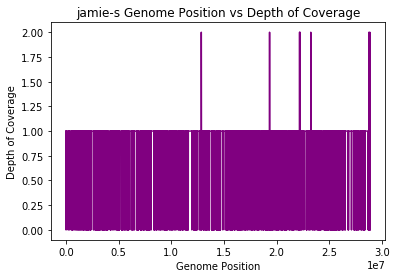

In [19]:
j_all_depths = [j[2] for j in j_data]
plt.plot(j_all_depths, color='purple')
plt.title('jamie-s Genome Position vs Depth of Coverage')
plt.xlabel('Genome Position')
plt.ylabel('Depth of Coverage')

The "jamie-s Genome Position vs. Depth of Coverage" Plot (the purple one) above shows that the regions near 1.3e7, 2e7, and 2.8e7 region has higher average of coverage than the rest. Therefore, I will zoom in the first four peaks.

**2. Once identified the regions, get the region name, position, (and its depth just to double-check whether the position has the highest depth).**

In [40]:
zoomin = [[d[0], d[1], d[2]] for d in j_data if d[2] > 1]
zoomin[0:5] #demo

[['chr7', 84306892, 2],
 ['chr7', 84306893, 2],
 ['chr7', 84306894, 2],
 ['chr7', 84306895, 2],
 ['chr7', 84306896, 2]]

**3. Categorize the previous data, get the chromosome name, the start position, and end position.**

In [21]:
zoomin_chr = []
for i in zoomin:
    if i[0] not in zoomin_chr:
        zoomin_chr += [i[0]]  
zoomin_chr

['chr7', 'chr12', 'chr15', 'chr16', 'chrY']

In [22]:
zoomin_chr_range=[]
for z in zoomin_chr:
    p = [i[1]for i in zoomin if i[0]==z]
    temp = [z, min(p), max(p)]
    zoomin_chr_range.append(temp)
zoomin_chr_range

[['chr7', 84306892, 84306946],
 ['chr12', 45285619, 45285688],
 ['chr15', 30510261, 34689019],
 ['chr16', 33097974, 33098090],
 ['chrY', 18485047, 27170464]]

These are the regions I am going to extract the genes from. In the interest of saving time, I will choose the 2 shorter regions to blast: chr7, chr12

**4. Create a bam file that only has the sequences in those regions, and convert to fastq files for BLAST**

## Terminal: 
### Extract regions from jamie.sorted.bam
**samtools view -b jamie.sorted.bam chr7:84306892-84306946 > chr7.bam**     
**samtools view -b jamie.sorted.bam chr12:45285619-45285688 > chr12.bam**        
input: a sorted bam file containing Jamie's sequence    
output: bam files containing Jamie's sequences at specific regions.

### Convert the newly created bam files to fastq files      
**samtools bam2fq chr7.bam > chr7.fastq**    
**samtools bam2fq chr12.bam > chr12.fastq**    
input: a bam file containing Jamie's sequence    
output: fastq files containing Jamie's Jamie's sequences at specific regions.

**5. Read all fastq files, get the sequences**

In [23]:
seqs=[]
for file in (["chr7.fastq", "chr12.fastq"]):
    for r in SeqIO.parse(file, "fastq"):
        seqs.append(r.seq)  
seqs

[Seq('AAGCAAATAGATAATAGACTGACTAGATGAAAGCATTTTTATCTACCCAACCTT...GTA', SingleLetterAlphabet()),
 Seq('TTGTGCTTTGGCAACATTTGTTGTTGTTTGTGAATCACAGCTATGTTCAGTGGT...AAC', SingleLetterAlphabet()),
 Seq('TTATTTGTAACACTGATTTTTTTTCCTCCTGTGGGTCATGATTCTGTATAGAAA...TGC', SingleLetterAlphabet()),
 Seq('AATTGGGTAGAATATGGTTCCATCCCCTGCCTTGAGAGGATCTCAGAACAATAT...CCT', SingleLetterAlphabet())]

**6. Run qblast for all the sequences above. Get the accession numbers and the information of the proteins.**    
Since there are so many blast results, I only chose the top 4.

In [36]:
result = []
for s in seqs:
    result_handle = NCBIWWW.qblast("blastn", "nt", s)
    result_read = result_handle.read()
    splited_result = result_read.split('\n')
    for l in splited_result:
        if '<Hit_id>' in l:
            print(l)
        elif '<Hit_def>' in l:
            print(l)    

  <Hit_id>gi|16418283|gb|AC092022.5|</Hit_id>
  <Hit_def>Homo sapiens BAC clone RP11-750F10 from 7, complete sequence</Hit_def>
  <Hit_id>gi|38524746|gb|AC146156.2|</Hit_id>
  <Hit_def>Pan troglodytes BAC clone RP43-1P23 from chromosome 7, complete sequence</Hit_def>
  <Hit_id>gi|38524750|gb|AC145865.2|</Hit_id>
  <Hit_def>Pan troglodytes BAC clone RP43-20N5 from chromosome 7, complete sequence</Hit_def>
  <Hit_id>gi|38524728|gb|AC147039.2|</Hit_id>
  <Hit_def>Pan troglodytes BAC clone RP43-117G22 from chromosome 7, complete sequence</Hit_def>
  <Hit_id>gi|987976949|emb|LT160002.1|</Hit_id>
  <Hit_def>Macaca fascicularis complete genome, chromosome chr3</Hit_def>
  <Hit_id>gi|850481938|gb|CP011889.1|</Hit_id>
  <Hit_def>Ovis canadensis canadensis isolate 43U chromosome 4 sequence</Hit_def>
  <Hit_id>gi|1370130508|gb|CP028094.1|</Hit_id>
  <Hit_def>Synechocystis sp. IPPAS B-1465 chromosome, complete genome</Hit_def>
  <Hit_id>gi|1353793167|gb|CP027077.1|</Hit_id>
  <Hit_def>Bos mutus is

  <Hit_id>gi|11496309|gb|AC079033.12|</Hit_id>
  <Hit_def>Homo sapiens 12 BAC RP11-453L7 (Roswell Park Cancer Institute Human BAC Library) complete sequence</Hit_def>
  <Hit_id>gi|1477771519|gb|CP025646.1|</Hit_id>
  <Hit_def>Ipomoea trifida cultivar NCNSP0306 chromosome 3</Hit_def>
  <Hit_id>gi|850485665|gb|CP011894.1|</Hit_id>
  <Hit_def>Ovis canadensis canadensis isolate 43U chromosome 9 sequence</Hit_def>
  <Hit_id>gi|1353793177|gb|CP027087.1|</Hit_id>
  <Hit_def>Bos mutus isolate yakQH1 chromosome 19</Hit_def>
  <Hit_id>gi|1189419121|gb|CP018163.1|</Hit_id>
  <Hit_def>Oryza sativa Indica Group cultivar Shuhui498 chromosome 7 sequence</Hit_def>
  <Hit_id>gi|937924750|dbj|AP014963.1|</Hit_id>
  <Hit_def>Oryza sativa Japonica Group DNA, chromosome 7, cultivar: Nipponbare, complete sequence</Hit_def>
  <Hit_id>gi|932283106|gb|CP012615.1|</Hit_id>
  <Hit_def>Oryza sativa Indica Group cultivar RP Bio-226 chromosome 7 sequence</Hit_def>
  <Hit_id>gi|699034075|emb|HG970334.1|</Hit_id>
  <

### Results

|Accession number|Gene
|----------------|-------
|XM_010902349.2|Esox lucius dynactin subunit 4 (dctn4)
|XM_008276366.1|Stegastes partitus kinase suppressor of Ras 1-like 
|NG_050651.1|ATP binding cassette subfamily C member 4 (ABCC4)
|XM_015491180.1|Marmota retinoblastoma binding protein 6 (Rbbp6)
|XM_005518805.2|Pseudopodoces humilis Bet1 golgi vesicular membrane trafficking protein (BET1) 
|XM_009491587.1|Pelecanus crispus phenylalanine hydroxylase (PAH)
|KJ194814.1|HIV-1 isolate F1_DU2922bh_2013 from Romania pol protein (pol) gene  
|KT779115.1|Pyrophorus punctatissimus isolate VhcPyroP01 tRNA-Ile and 12S ribosomal RNA genes
|XM_021272508.1|Anas platyrhynchos NUAK family kinase 1 (NUAK1)

*The results here are off because the region I selected are short, therefore the blast result does not accurately represent Jamie's gene. For example, there are many Drosophila and Pan troglodytes genomes also match. If the longer region were used, blast result will be more accurate.*